### `Multiple Linear Regression`

Linear Regression is a useful tool for predicting a quantitative response. We have the linear regression model has the form:

$f(x) = \beta_0 + \sum\limits_{j=1}^p X_j\beta_j$

**where**
- $f(x)$: response/dependent variable
- $X_j$: explanatory/independent variable
- $\beta_j$: slope coefficient
- $\beta_0$: intercept terms

#### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

#### **Load the Data**

The advertising dataset captures sales revenue generated with respect to advertisement spends across multiple channel like radio, TV, and newspaper.

In [3]:
data = pd.read_csv('../../csv/advertising.csv').drop(columns='Unnamed: 0')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.info() #datanya numerical semua

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### **Data Analysis**

Let's explore these types of relationships across the entire data set. Based off this plot what looks to be the most correlated feature sales?

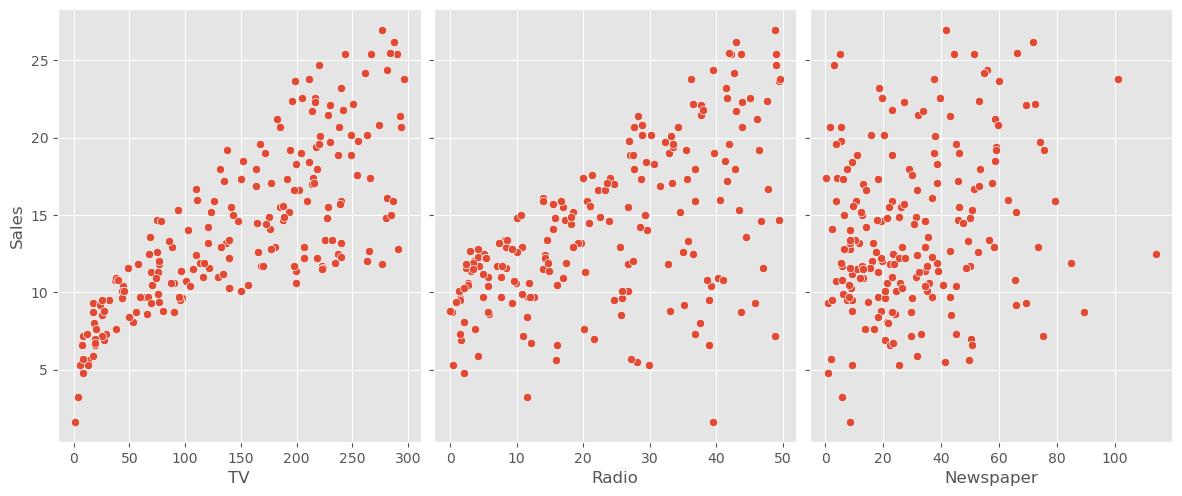

In [6]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=5,aspect=0.8)
plt.show()

#### **Estimating Coefficients**

Create a linear model plot of sales from tv, radio, and newspaper variable.

In [7]:
sm_ls = sm.OLS(data['Sales'],sm.add_constant(data.drop(columns=['Sales'])))
result = sm_ls.fit()


In [8]:
print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


In [9]:
#karna newspapernya pvalue > 0.05 maka kita drop saja karna tidak berpengaruh ke Sales
sm_ls = sm.OLS(data['Sales'],sm.add_constant(data.drop(columns=['Sales','Newspaper'])))
result = sm_ls.fit()

In [10]:
print(result.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204


Now, the linear regression equation becomes:

$Sales = 2.9389 + 0.0458TV + 0.1880Radio$

Parameter Estimate:
- **conts = 2.9211** : When we do not advertise through TV and Radio channels, the sales generated is $2.9211
- **Radio = 0.1880** : When the advertising spent on radio is 1 dollar, the sales generated increases by 0.1880 dollars. This interpretation is only recommended when we spend on radio between 0 and 49.6 dollars and do not spend on TV.
- **TV = 0.0458** : When the advertising spent on TV is 1 dollar, the sales generated increases by 0.0458 dollars. This interpretation is only recommended when we spend on TV between 0.7 and 296.4 dollars and do not spend on radio.

#### **Evaluating the Model**

Let's evaluate our model performance by looking at the following table:

In [11]:
print(result.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           4.83e-98
Time:                        16:37:40   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         


**F-Test**, used to determine whether a complex model is better than a simpler version of the same model in explaining the variance in the dependent variable.

In [12]:
result.f_pvalue

4.827361851335384e-98

P-Value of the Simultant test (Prob (F-statistics)) is below 0.05. We have enough evidence that spending on advertising through radio and TV affects the sales generated.

**R-squared**, which sometimes is also known as the coefficient of determination, defines the degree to which the variance in the dependent variable (target or response) can be explained by the independent variable (features or predictors).

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

In [13]:
result.rsquared

0.8971942610828957

We observed 89.7% variability in sales is explained by its linear relationship with tv and radio while 10.3% variations are uncounted for.

**Adj. R-squared**, measures the proportion ov variations explained by only those independent variables that really help in explaining the dependent variable. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected.

$R^2 = 1 - \frac{SS_{res}/n - k}{SS_{tot}/n - 1}$

In [14]:
result.rsquared_adj

0.8961505479974429

We observed that the independent variable Newspaper is ingsignificant or it doesn't contribute to explain the variation in the dependent variable. Hence, the adjusted-R2 is the same due to the involvement of insignificant variables and will potentially undermine the predictive power of the other variables that have been included in the model and found to be significant.

**Mean Squared Error** (MSE) is the mean of the squared errors.

$MSE = \frac{1}{n} \sum\limits_{n=1}^p (y_i - \hat{y}_i)^2$

A larger MSE indicates that the data point are dispersed widely around its central moment (mean), whereas a smaller MSE suggest the opposite. A smaller MSE is preferred because it indicates that your data points are dispersed closely around its central moment (mean).

In [15]:
y_pred = result.predict(sm.add_constant(data[['TV','Radio']]))
y_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [16]:
data['Sales']

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [17]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(data['Sales'],y_pred)
MSE

2.784569900338091

**Root Mean Squared Error** (RMSE) is the root mean of the squared errors.

$RMSE = \sqrt{\frac{1}{n} \sum\limits_{n=1}^p (y_i - \hat{y}_i)^2}$

RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in forecasting and regression analysis to verify experimental result.

In [18]:
RMSE = mean_squared_error(data['Sales'],y_pred,squared=False)
RMSE

c:\Users\Fiki\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.6687030593661927

In [19]:
#atau begini lebih gampangnya
np.sqrt(MSE)

1.6687030593661927

#### **Residual Analysis**

Let's evaluate our model performance by looking at residual. Residuals is used to assess some assumption in model. Each assumption that is violated has its own impact on the results of analysis and predictions.

- The regression model is linear in the parameters and the error term
- The error term are normally distributed
- Gauss-Markov (Specific to Least Square):
    - The error term has a population mean of zero
    - The error term has constant variance (Homoscedasticity)
    - Observation of the error terms are uncorrelated with each other





In [20]:
#Residual = y-y_pred
#residual = data['Sales']-y_pred

residual = result.resid #lebih simple pake ini
residual.head()

0    1.544535
1   -1.945362
2   -3.037018
3    0.882884
4   -0.323908
dtype: float64

In [21]:
print(result.summary().tables[2])

Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.


`1. Normality Assumption`

Simultant Test (F-Test) and Partial Test (T-Test) needs normality assumption so the test result more valid.

We can asses normality assumption using:
- histogram
- qqplot
- normality test such as : kolmogorov-smirnov (KS), Jarque-Bera (JB), etc


c:\Users\Fiki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


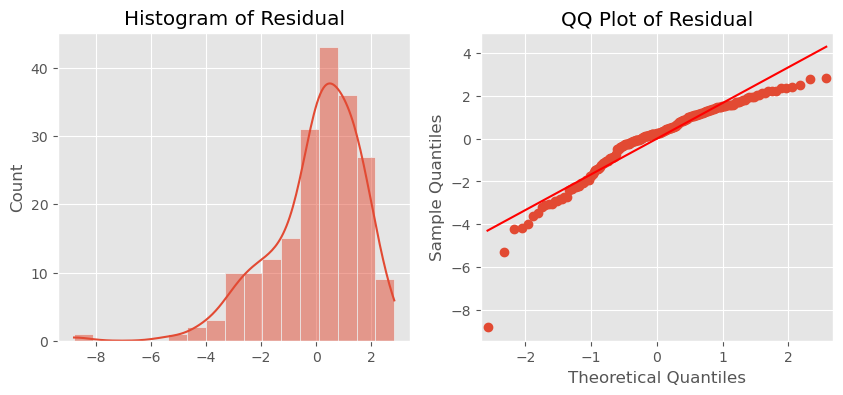

In [22]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

sns.histplot(residual,kde=True, ax=ax[0])
ax[0].set_title('Histogram of Residual')

sm.qqplot(residual,line='s',ax=ax[1])
ax[1].set_title('QQ Plot of Residual')

plt.show()

**Jarque-Bera test**, The Jarque-Bera (JB) test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution.

Samples from a normal distribution have an:
- expected skewness of 0 and
- an expected excess kurtosis of 0 (which is the same as kurtosis of 3)

Hypothesis:
- H0: Normal
- H1: Not normal

Any deviation from this assumptions increases the JB statistic. Next, we calculate the statistics but you can also find the results of the Jarque-Bera test in the regression summary.


In [23]:
name = ['Jarque-Berra Stat','Chi-Square Prob','Skew','Kurtosis']
test = sm.stats.jarque_bera(residual)
lzip(name,test)

[('Jarque-Berra Stat', 148.67851197833463),
 ('Chi-Square Prob', 5.186463610328629e-33),
 ('Skew', -1.3234431801449735),
 ('Kurtosis', 6.2917190088328)]

**Summary**

- Residuals are not normally distributed
- So the assumption of normality is not met

`2. Gauss Markov Assumption`

- The error term has a population mean of zero
- Observation of the error terms are uncorrelated with each other
- The error term has constant variance/Non Constant standard deviation (Homoscedasticity)

In [24]:
residual.mean()
#error nya sangat kecil mendekati 0

3.517186542012496e-15

In [25]:
result.fittedvalues

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [26]:
data['Sales']

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

**Residual plot**, are a useful graphical tool for identifying non-linearity as well as heteroscedasticity. The residuals of this plot are those of the regression fit with all predictors.

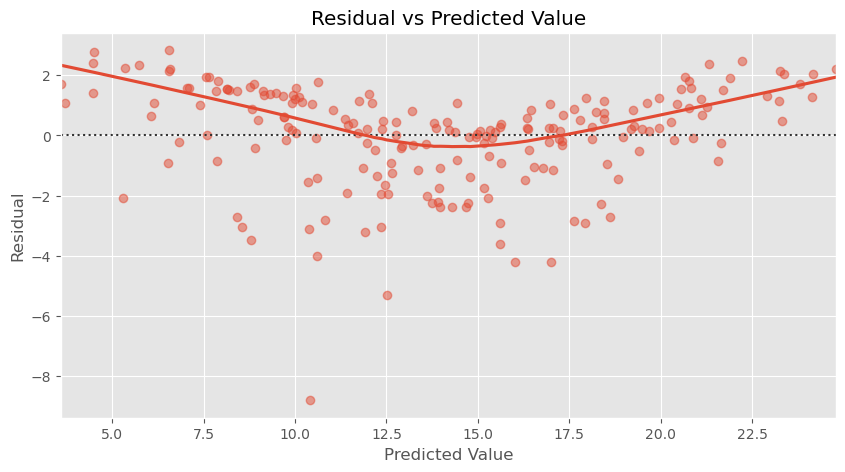

In [27]:
plt.figure(figsize=(10,5))

plot = sns.residplot(
    x=result.fittedvalues,
    y='Sales',
    data=data,
    lowess=True,
    scatter_kws={'alpha':0.5}
)
plot.set_title('Residual vs Predicted Value')
plot.set_xlabel('Predicted Value')
plot.set_ylabel('Residual')

plt.show()

![](https://condor.depaul.edu/sjost/it223/documents/resid-plots.gif)

**Durbin-Watson test**, a test of autocorrelation that is designed to take account of the regression model is the Durbin-Watson test (also included in the regression summary). It is used to test the hypothesis that there is no lag one autocorrelation in the residuals.

Autocorrelation occurs when the residuals are not independent from each other. Linear regression analysis requires that there is little or no autocorrelation in the data. For instance, this typically occurs in stock prices, where the price is not dependent from the previous price.

- If there is no autocorrelation, the Durbin-Watson distribution is symmetric around 2.

- As a rough rule of thumb (Field, 2013):

    - If Durbin–Watson is less than 1.0, there may be cause for concern.
    - Small values of d indicate successive error terms are positively correlated.
    - If d > 2, successive error terms are negatively correlated.

In [28]:
sm.stats.durbin_watson(residual)

2.080780601004532

In [29]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           4.83e-98
Time:                        16:37:41   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

**Breusch-Pagan Lagrange Multiplier test**, Breusch-Pagan Lagrange Multiplier test can be used to identify heteroscedasticity.

Hypothesis:
- H0: homoscedasticity, which means that the residual variance does not depend on the values of the variable in x.
- H1: heteroscedasticity

Note that this test may exaggerate the significance of results in small or moderately large samples. In this case the F-statistic is preferable.

In [30]:
name = ['Lagrange Multiplier Statistic', 'P-value', 'F-Value', 'F_P-Value']
test = sm.stats.het_breuschpagan(residual,result.model.exog)
lzip(name,test)

#karna p-value nya > 0.05 maka gagal menolak H0 maka termasuk homoscedasticity

[('Lagrange Multiplier Statistic', 4.809299865939409),
 ('P-value', 0.09029710011529549),
 ('F-Value', 2.4269395850810236),
 ('F_P-Value', 0.0909429273412957)]

**Summary**

a. The error term has a population mean of zero = 5.86e-15 (near 0)
- Fulfilled, because the number of positive and negative errors is the same

b. Uncorrelated error
- Fulfilled, because the errors do not form a particular pattern

c. Homoscedasticity
- Fulfilled (homoscedasticity), constant variance.

#### **Multicollinearity**

Collinearity refers to the situation in which two or more predictor variables collinearity are closely related to one another. The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response. It is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation. We call this situation multicollinearity.

Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.

$VIF(X_j) = \frac{1}{1 - R_j^2}$

**Notes:**

- The smallest possible value for VIF is 1, which indicates the complete absence of collinearity.
- Typically in practice there is a small amount of collinearity among the predictors.
- A VIF greater than 10 indicates that collinearity is very high. A VIF value of more than 4 is not acceptable.
- As a rule of thumb, a VIF value that exceeds 5 indicates a problematic amount of collinearity and the parameter estimates will have large standard errors because of this.



In [31]:
X = data[['TV','Radio']]
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
vif

,feature,VIF
0,TV,2.238085
1,Radio,2.238085


We don't have a problematic amount of collinearity in our data.

### `Application`

### `Business Problem Understanding`

**Problem Statement**

Karena jumlah tips bervariasi, maka menentukan harga yang sesuai sangatlah penting bagi kesejahteraan karyawan.

**Goals**

Menentukan jumlah tip yang tepat untuk tiap customer yang berkunjung.

**Analytic Approach**

Jadi yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu customer dengan customer yang lain.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan tool prediksi tip dari customer baru, yang mana akan berguna untuk meningkatkan kesejahteraan karyawan.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah MSE dan RMSE. Semakin kecil nilai keduanya, berarti model semakin akurat dalam memprediksi harga tip sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menurunkan nilai R-squared atau adj. R-squared untuk mengetahui seberapa baik model dapat mempresentasilam varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.



### `Data Understanding`

**Initial Assesment**

In [32]:
# Cek tipe data, nilai null, dan nilai unik dari setiap kolom
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,TV,float64,0.0,False,190,"[230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 1..."
1,Radio,float64,0.0,False,167,"[37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19...."
2,Newspaper,float64,0.0,False,172,"[69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11...."
3,Sales,float64,0.0,False,121,"[22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2,..."


**Insight**

- Dataset terdiri dari 243 baris dan 7 kolom.
- Variabel numerik: total_bill, tip, dan size
- Variabel kategorikal: sex, smoker, day, dan time
- Tidak ada missing values di dalam data

**Numerical variable**

**Insight**

- Variabel tip dan total_bill termasuk variabel kontinu, sedangkan size termasuk variabel diskrit.
- Hubungan antara variabel tip dan total_bill membentuk pola linear.
- Frekuensi pada size 2, 3, dan 4 lebih dominan dibandingkan pada size lainnya.

**Categorical variable**

**Insight**

- Jumlah customer pria lebih banyak dibandingkan wanita
- Customer lebih menyukai dinner di akhir pekan (hari sabtu dan minggu) dan lunch pada hari kerja (hari kamis dan jumat)
- Penurunan customer secara signifikan terjadi pada hari jumat.
- Kebanyakan customer adalah perokok aktif.

### `Data Preparation`

**Data Wrangling**

**Rare Label**, ditemukan rare label pada kolom `size`, beberapa kategori muncul dominan, sedangkan beberapa lainnya hanya muncul di sejumlah kecil data. Jika rare label digunakan, dapat menambah noise, menyebabkan overfititng pada model.

**Insight**

- Size 2, 3, dan 4 muncul lebih dari 10% sedangkan sisanya muncul kurang dari itu. Label 1, 5, dan 6 adalah nilai yang jarang muncul atau rare label.
- Frekuensi size 2 mendominasi dibandingkan nilai size lainnya, yaitu sekitar 60%.

Kelompokkan kembali kategori `size` ke dalam **Single/couple** dan **Group**

Outlier, adalah titik data yang secara signifikan berbeda dari data lainnya. Model linier, khususnya regresi linier, sensitif terhadap outlier. Oleh karena itu, kita perlu mendeteksi dan menangani outlier.

Pertama, coba deteksi dan kuantifikasi outlier secara univariate.

In [33]:
def n_outlier(data):
    q1, q3 = data.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - iqr * 1.5
    upper = q3 + iqr * 1.5

    n = len(data)
    n_upper = len(np.where(data > upper)[0])/n
    n_lower = len(np.where(data < lower)[0])/n
    print(f'Percentage: {round((n_upper + n_lower)*100, 2)}')
    return lower, upper

lower, upper = n_outlier(data['total_bill'])

KeyError: 'total_bill'

Persentase outlier termasuk kecil (<5%) maka bisa diabaikan.

**Insight**
- Distribusi dari variabel total_bill tidak simetris, ada dugaan bukan distribusi normal
- Skewness lebih condong ke kanan atau positive
- Berdasarkan batas IQR, sekitar 3.69% diidentifikasi sebagai outlier.

**Feature Engineering**

Ubah variabel kategorikal menjadi numerikal dengan encoding

**Check Multicollinearity**

Karena VIF untuk feature `time_Dinner` > 10, kita akan coba drop kolom `time_Dinner`.

Sekarang sudah tidak terdapat Multicolinearity

**Data Splitting**

Bagi dataset menjadi train dan test set dengan komposisi 80:20.

### `Modeling`

**Simple Linear Regression**

Prediksi pada test set dengan menggunakan linear regression

**Multiple Linear Regression**

Prediksi pada test set dengan menggunakan multiple linear regression

**Performance Comparison**

Setelah dilakukan prediksi pada test set, performa simple linear regression secara akumulatif sedikit lebih baik dari linear regression. Selain itu kita dapat melihat pada tabel multiple linear regression bahwa fitur sex_Female hingga size_Single/couple memiliki nilai P>|t| lebih besar dari 0.05 sehingga fitur fitur tersebut tidak berpengaruh signifikan. Namun kita akan tetap coba melakukan interpretasi dari model multiple linear regression.

**Interpretation**

Persamaan regresi linear:
- 1

R-Squared:
- 1

F-test (Simultant test):
- 1

t-test (Partial test)
- 1

Parameter Estimate:
- 1

Limitasi model:
- 1

Residual:
- 1

### `Conclusion`

Berdasarkan pemodelan yang sudah dilakukan, besarnya `tip` dipengaruhi oleh 'total_bill'.

Metrik evaluasi yang digunakan pada model adalah nilai MSE dan RMSE. Jika ditinjau dari nilai RMSE yang dihasilkan oleh model yaitu sebesar $0.85, artinya jika model ini digunakan untuk memperkirakan tip, hasil prediksi akan meleset $0.85 dari tip seharusnya.
Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan tip (selain total bill)

### `Recommendations`

Hal yang dapat dilakukan utnuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan variabel independen. pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dari aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.

2. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('tips')

3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih komples, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.

4. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya.
